In [1]:
# cd to base directory of this repository to enable the loading of NEURON simulations
import os
os.chdir('../../')
from neuron import h
from neurostim.cell import Cell
import pickle

scaling_neurons = 0.5
neuron_color = 'tab:blue'

## L5 cell

In [2]:
from matplotlib.cm import jet
from neurostim.models import *
cellname = 'L5_Hay2011_cell2_vertical_shaft'
ChR_soma_density=13e9
ChR_distribution='uniform'
path = 'plotly-viz/cell_collections/'
plotpath = 'plotly-viz/cell_plots/'
filename='_'.join([cellname, str(ChR_soma_density), ChR_distribution,'.pickle'])
plotname='_'.join([cellname, str(ChR_soma_density), ChR_distribution,'.png'])

# NEURON setup
h.load_file("stdrun.hoc")
h.cvode_active(1)
model = eval(cellname+'()')
cell = Cell(model, ChR_soma_density=ChR_soma_density, ChR_distribution=ChR_distribution)
xz_collection = cell.plot_foutz2012(lambda sec:sec(0.5).z_chanrhod, axes='xz', cmap=jet)
with open(''.join([path,'/xz/',filename]), 'wb') as file:
      pickle.dump(xz_collection, file)
xy_collection = cell.plot_foutz2012(lambda sec:sec(0.5).z_chanrhod, axes='xy', cmap=jet)
with open(''.join([path,'/xy/',filename]), 'wb') as file:
      pickle.dump(xy_collection, file, protocol=1)

L5PCtemplate[0].axon[0]
L5PCtemplate[0].axon[1]
----------------------------------------------------------------------------------------------------
DATA RANGE:  -1233.916181510454 -100.77393482262848
----------------------------------------------------------------------------------------------------
DATA RANGE:  -1233.916181510454 -100.77393482262848


----------------------------------------------------------------------------------------------------
DATA RANGE:  -1233.916181510454 -100.77393482262848
----------------------------------------------------------------------------------------------------
DATA RANGE:  -1233.916181510454 -100.77393482262848


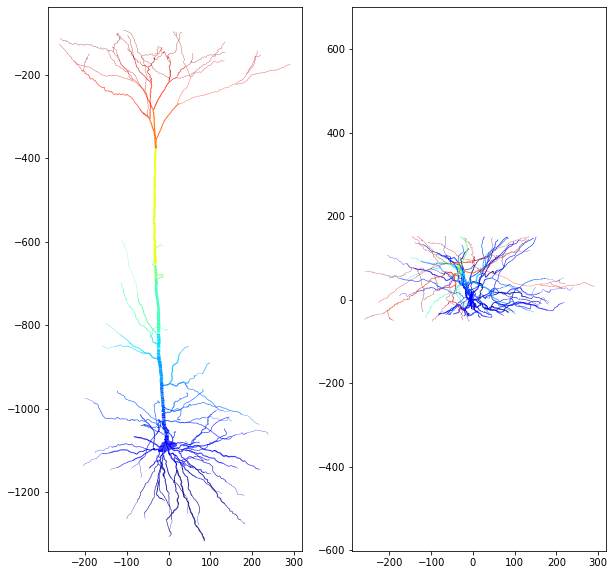

In [3]:
import matplotlib.pyplot as plt
from matplotlib.cm import jet
fig, axs = plt.subplots(ncols=2, figsize=(10,10))
collection = cell.plot_foutz2012(
    lambda sec:sec(0.5).z_chanrhod, axes='xz', cmap=jet)
axs[0].add_collection(collection)
axs[0].axis('equal')
axs[0].set_ylim(None,0)
collection = cell.plot_foutz2012(lambda sec:sec(0.5).z_chanrhod, axes='xy', cmap=jet, reverse_draw_order=True)
axs[1].add_collection(collection)
axs[1].axis('equal')
plt.savefig(''.join([plotpath,plotname]), dpi=300)
plt.show()